### GENERAL TRAJECTORY ANALYSIS 

This jupyter acts as a complete, modular analysis pipeline with rudimentary plots and figures as well as more extensive analyses performed.


In [1]:
#packages and dependencies in python
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align, rms
from MDAnalysis.lib import distances
from MDAnalysis.analysis.dihedrals import Dihedral, Ramachandran
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

First step is preparation of necessary files and external analyses - not run in python itself. 
Dependencies : VMD and GROMACS  

In [2]:
os.system(
"""
/Users/admin/Desktop/VMD_1.9.4a57-x86_64-Rev12.app/Contents/MacOS/startup.command -dispdev text -e rmsf_rmsd_rgyr_PCA_prep.tcl -args ../md_noPBC.xtc
"""
)
os.system("cp rmsd.dat rmsd.xvg")
os.system(
"""
gmx analyze -f rmsd.xvg -ee 1_blocking.xvg
"""
)
os.system(
"""
gmx analyze -f rmsd.xvg -ac rmsd_autocorr.xvg
"""
)
os.system(
"""
/Users/admin/Desktop/VMD_1.9.4a57-x86_64-Rev12.app/Contents/MacOS/startup.command -dispdev text -e cluster_prep_rmsd_matrix.tcl -args ../md_noPBC.xtc
"""
)

Info) VMD for MACOSXX86_64, version 1.9.4a57 (April 27, 2022)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 4 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Dynamically loaded 1 plugins in directory:
Info) /Users/admin/Desktop/VMD_1.9.4a57-x86_64-Rev12.app/Contents/vmd/plugins/MACOSXX86_64/molfile
../md_noPBC.xtc
Info) Using plugin pdb for structure file ../step1_pdbreader.pdb
Info) Using plugin pdb for coordinates from file ../step1_pdbreader.pdb
Info) Determining bond structure from distance search ...
Info) Finished with coordinate file ../step1_pdbreader

                     :-) GROMACS - gmx analyze, 2024.4 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /Users/admin/Desktop/TP53_WITH_Zn2/TP53_Zn2_zaf/TP53_wt_Zn2/data_wt_Zn2/Analysis_zaf
Command line:
  gmx analyze -f rmsd.xvg -ee 1_blocking.xvg


Back Off! I just backed up 1_blocking.xvg to ./#1_blocking.xvg.1#
Using fixed parameters in curve fitting is temporarily not working.

GROMACS reminds you: "Money won't buy happiness, but it will pay the salaries of a large research staff to study the problem." (Bill Vaughan)

                     :-) GROMACS - gmx analyze, 2024.4 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /Users/admin/Desktop/TP53_WITH_Zn2/TP53_Zn2_zaf/TP53_wt_Zn2/data_wt_Zn2/Analysis_zaf
Command line:
  gmx analyze -f rmsd.xvg -ac rmsd_autocorr.xvg


Back Off! I just backed up rmsd_autocorr.xvg to ./#rmsd_autocorr.xvg.1#

GROMACS reminds you: "Money won't buy happiness, but it wi

Read 1 sets of 10002 points, dt = 1

                                      std. dev.    relative deviation of
                       standard       ---------   cumulants from those of
set      average       deviation      sqrt(n-1)   a Gaussian distribition
                                                      cum. 3   cum. 4
SS1   5.212338e+00   6.243693e-01   6.243381e-03      -0.124   -0.045

Info) VMD for MACOSXX86_64, version 1.9.4a57 (April 27, 2022)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 4 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Dynamica

0

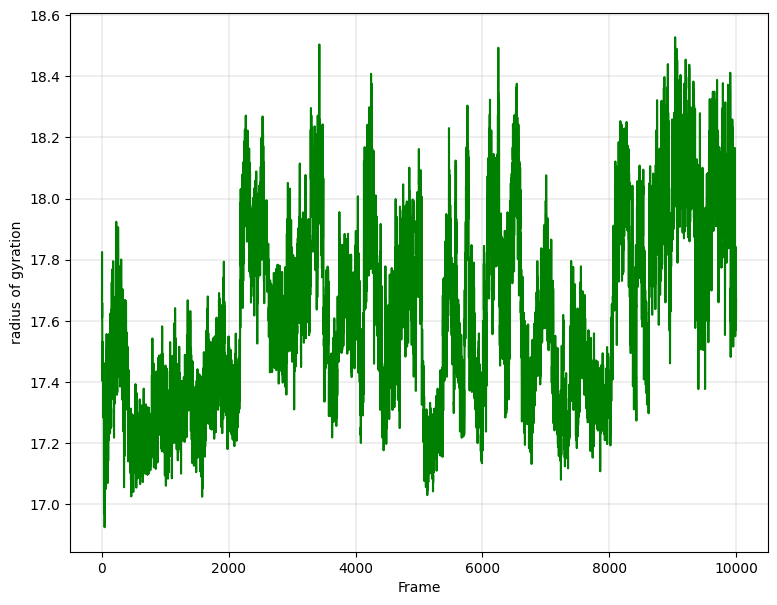

In [3]:
#Use numpy to load the data from a file 
d,g = np.loadtxt("rgyr.dat", unpack=True)

# pretty standard plot code
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.plot(d, g, 'g-')
ax.set_xlabel('Frame')
ax.set_ylabel(r'radius of gyration')
plt.grid(linewidth=0.3,linestyle='-')


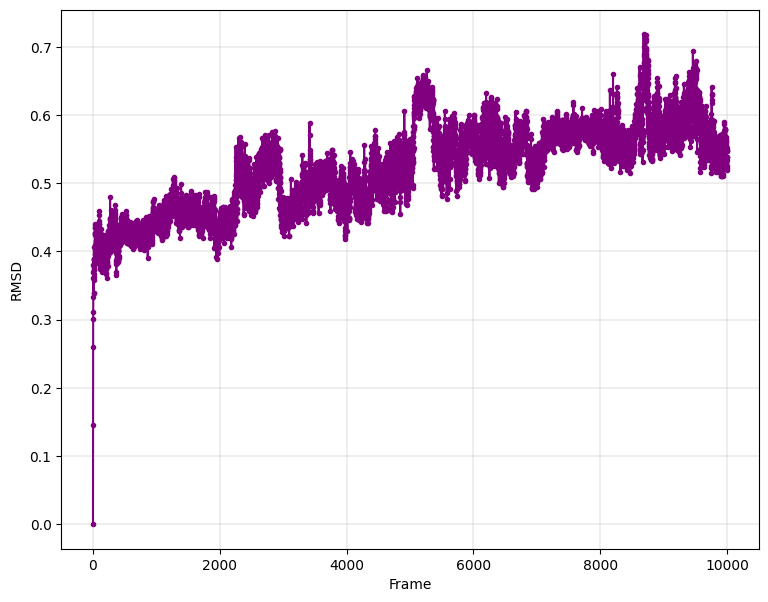

In [4]:

#Use numpy to load the data from a file 
d,g = np.loadtxt("rmsd.dat", unpack=True)

# pretty standard plot code
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.plot(d, g*0.1, color="purple", linestyle='-', marker='.')
ax.set_xlabel('Frame')
ax.set_ylabel(r'RMSD')
plt.grid(linewidth=0.3,linestyle='-')


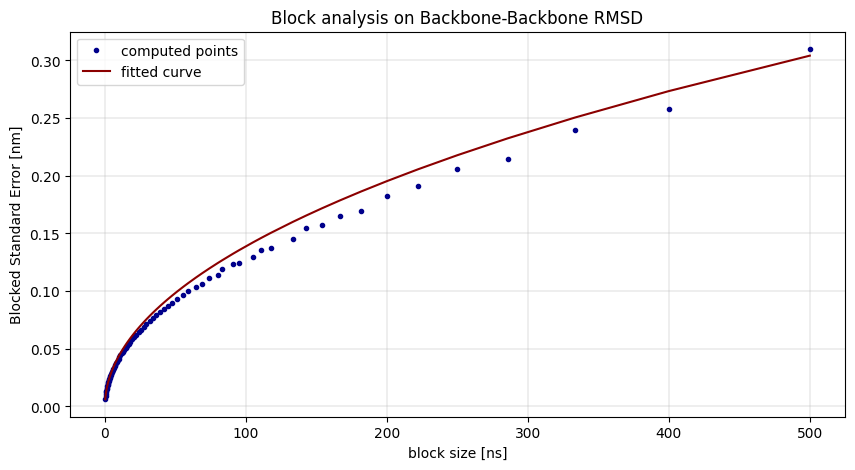

In [5]:
size,b,fit = np.loadtxt("1_blocking.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# Plotting the line representing the RMSF values
ax.plot(size*0.2,b, color="darkblue", linestyle='none', marker='.', label='computed points')
ax.plot(size*0.2,fit, color="darkred", linestyle='-', label='fitted curve')
ax.set_title("Block analysis on Backbone-Backbone RMSD")
ax.set_xlabel("block size [ns]")
ax.set_ylabel(r"Blocked Standard Error [nm]")
plt.grid(linewidth=0.3,linestyle='-')
plt.legend()
# Displaying the plot
plt.savefig("block_analysis")

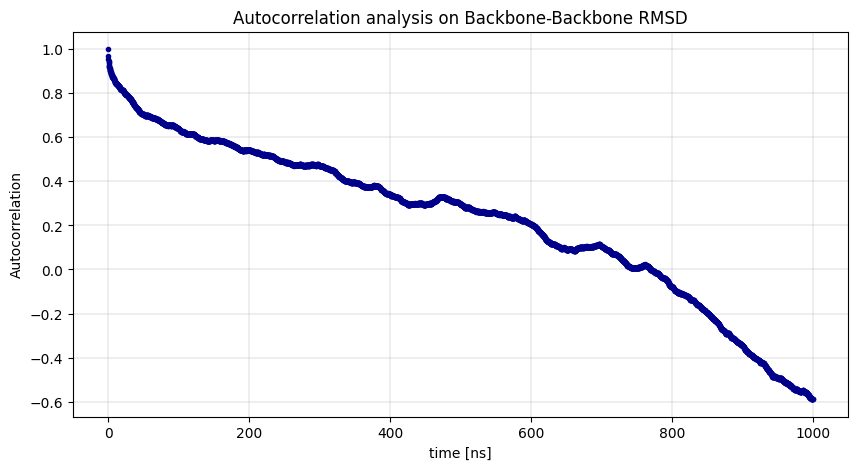

In [6]:
time,auto = np.loadtxt("rmsd_autocorr.xvg", comments=["@", "#", "&"], unpack=True)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# Plotting the line representing the RMSF values
ax.plot(time*0.2,auto, color="darkblue", linestyle='none', marker='.')
ax.set_title("Autocorrelation analysis on Backbone-Backbone RMSD")
ax.set_xlabel("time [ns]")
ax.set_ylabel(r"Autocorrelation")
plt.grid(linewidth=0.3,linestyle='-')
# Displaying the plot
plt.savefig("autocorr_analysis")

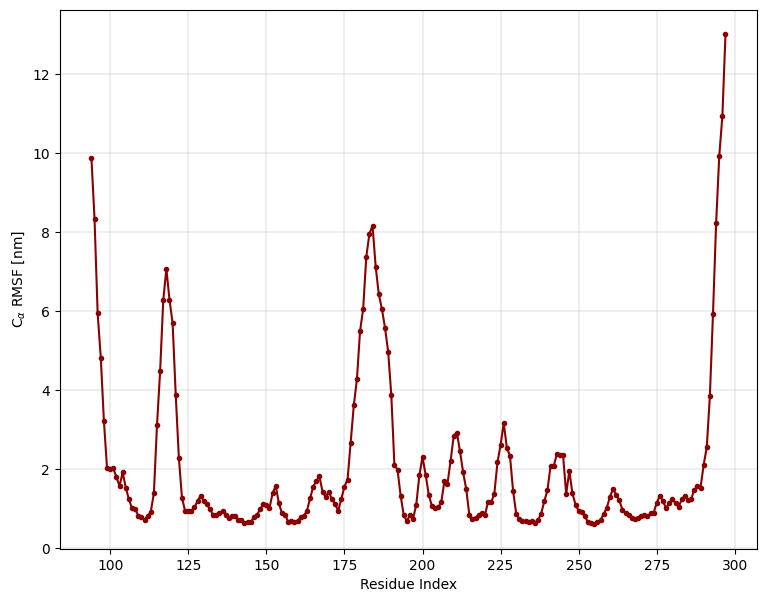

In [7]:
#Use numpy to load the data from a file 
d = np.loadtxt("rmsf.dat", unpack=True)

g = list(range(94,len(d)+94))

# pretty standard plot code
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.plot(g, d, color="darkred", linestyle="-", marker=".")
ax.set_xlabel('Residue Index')
ax.set_ylabel(r'C$_\alpha$ RMSF [nm]')
plt.grid(linewidth=0.3,linestyle='-')



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


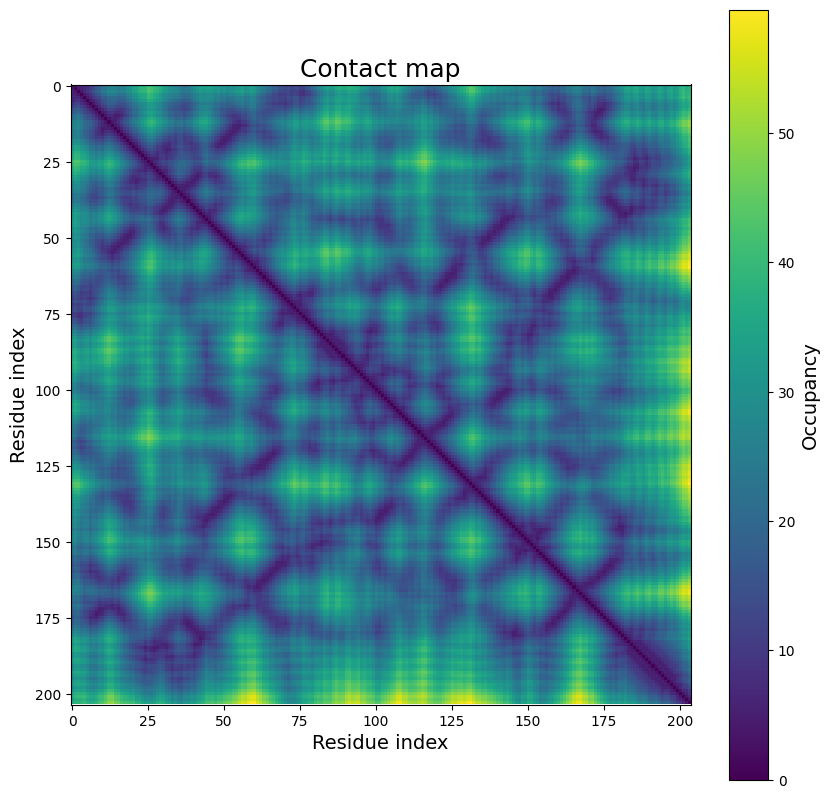

In [8]:
gro = '../step1_pdbreader.pdb'
xtc = '../md_noPBC.xtc'

u = mda.Universe(str(gro),str(xtc))

Ca = u.select_atoms('name CA')
distance_CalphaCalpha = distances.distance_array(Ca.positions, Ca.positions)

plt.figure(figsize=((10,10)))
plt.title("Contact map", fontsize=18)
img = plt.imshow(distance_CalphaCalpha)
plt.colorbar(img).set_label(label='Occupancy', size=14)
plt.xlabel('Residue index',fontsize=14)
plt.ylabel('Residue index',fontsize=14)
plt.savefig("Contact_map")

In [9]:
tot = u.select_atoms("resid 94-296")
Ramachandran_tot = Ramachandran(tot).run()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/MDAnalysis/analysis/dihedrals.py:418: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


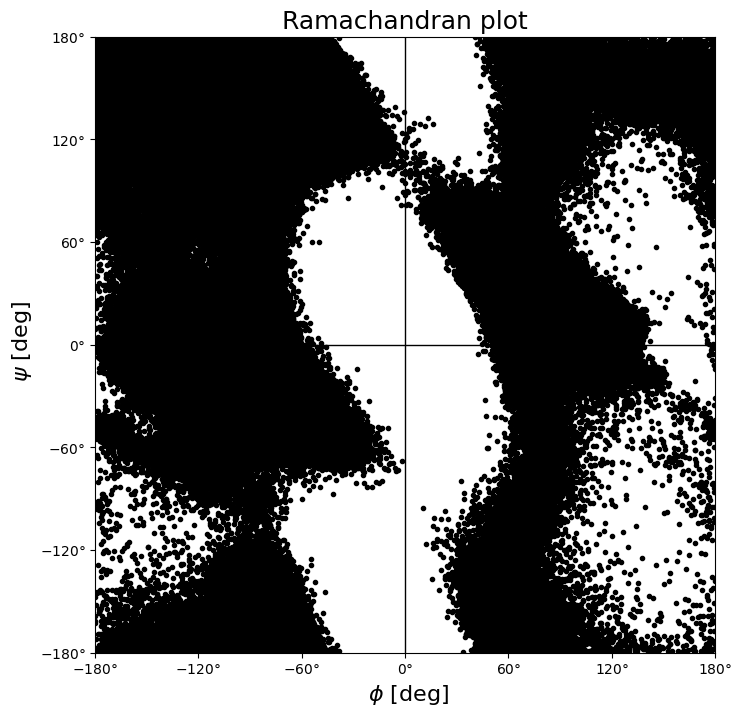

In [10]:

fig, ax = plt.subplots(figsize=(8,8))
Ramachandran_tot.plot(ax=ax, color='k', marker='.')
ax.set_title("Ramachandran plot", fontsize=18)
ax.set_xlabel(r" $\phi$ [deg]", fontsize=16)
ax.set_ylabel(r" $\psi$ [deg]", fontsize=16)
plt.savefig("Ramachandran")

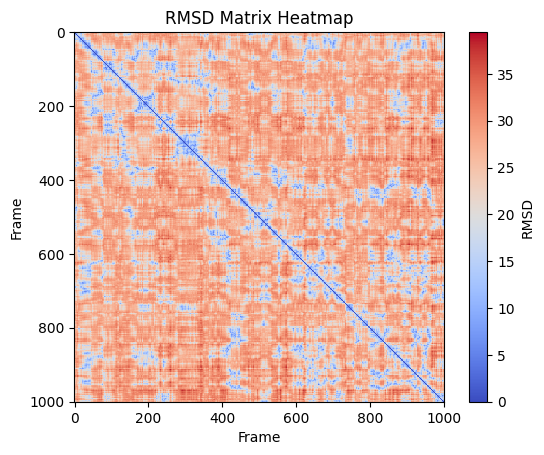

In [11]:
def read_rmsd_matrix(file_path):
    """
    Reads the lower triangular RMSD matrix from the file and returns it as a list of lists.
    """
    matrix = []
    with open(file_path, 'r') as f:
        for line in f:
            # Split by spaces, convert to float, and append the row to the matrix
            row = [float(x) for x in line.strip().split()]
            matrix.append(row)
    return matrix

def build_full_matrix(lower_matrix):
    """
    Rebuilds the full symmetric RMSD matrix from the lower triangular matrix.
    """
    size = len(lower_matrix)
    full_matrix = np.zeros((size, size))

    # Fill in the lower triangular part and use it to fill the symmetric upper part
    for i in range(size):
        for j in range(i + 1):
            full_matrix[i, j] = lower_matrix[i][j]
            full_matrix[j, i] = lower_matrix[i][j]
    
    return full_matrix

def plot_rmsd_matrix(matrix):
    """
    Plots the RMSD matrix as a heatmap using matplotlib.
    """
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='RMSD')
    plt.title('RMSD Matrix Heatmap')
    plt.xlabel('Frame')
    plt.ylabel('Frame')
    plt.show()

# Main program
if __name__ == '__main__':
    # Step 1: Read the lower triangular matrix from the output file
    rmsd_file = 'rmsd_matrix.txt'  # Path to your output file
    lower_matrix = read_rmsd_matrix(rmsd_file)

    # Step 2: Rebuild the full symmetric RMSD matrix
    full_matrix = build_full_matrix(lower_matrix)

    # Step 3: Plot the RMSD matrix as a heatmap
    plot_rmsd_matrix(full_matrix)


(1001, 1001)


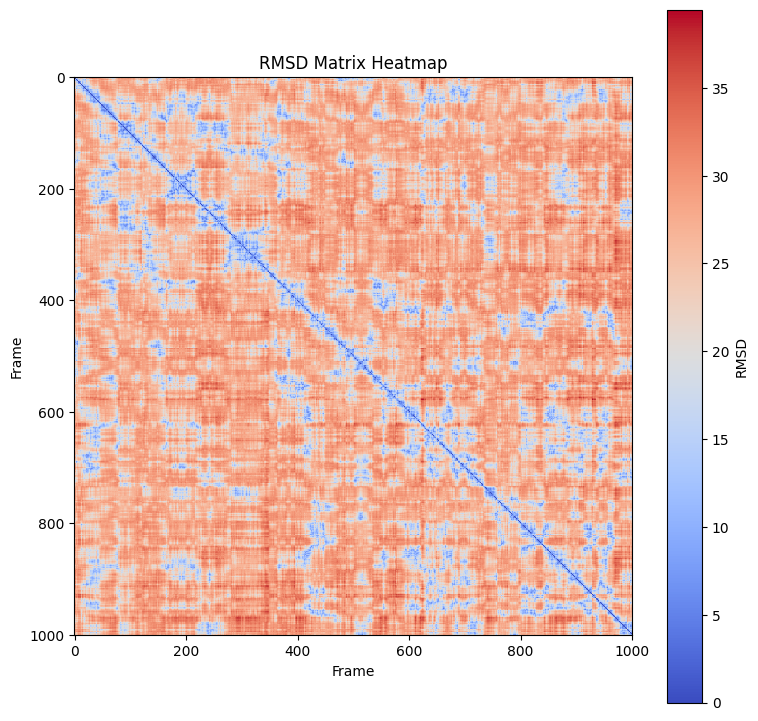

In [12]:
rmsd_mat = np.array(full_matrix)
print(rmsd_mat.shape)
plt.figure(figsize=(9,9))
plt.imshow(rmsd_mat, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='RMSD')
plt.title('RMSD Matrix Heatmap')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.savefig("rmsd_matrix")

In [13]:
Z = linkage(rmsd_mat, 'average', optimal_ordering=True)


/var/folders/q9/3_m1wtjn48qcqpr12gdycyhc0000gn/T/ipykernel_10990/3669077709.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(rmsd_mat, 'average', optimal_ordering=True)


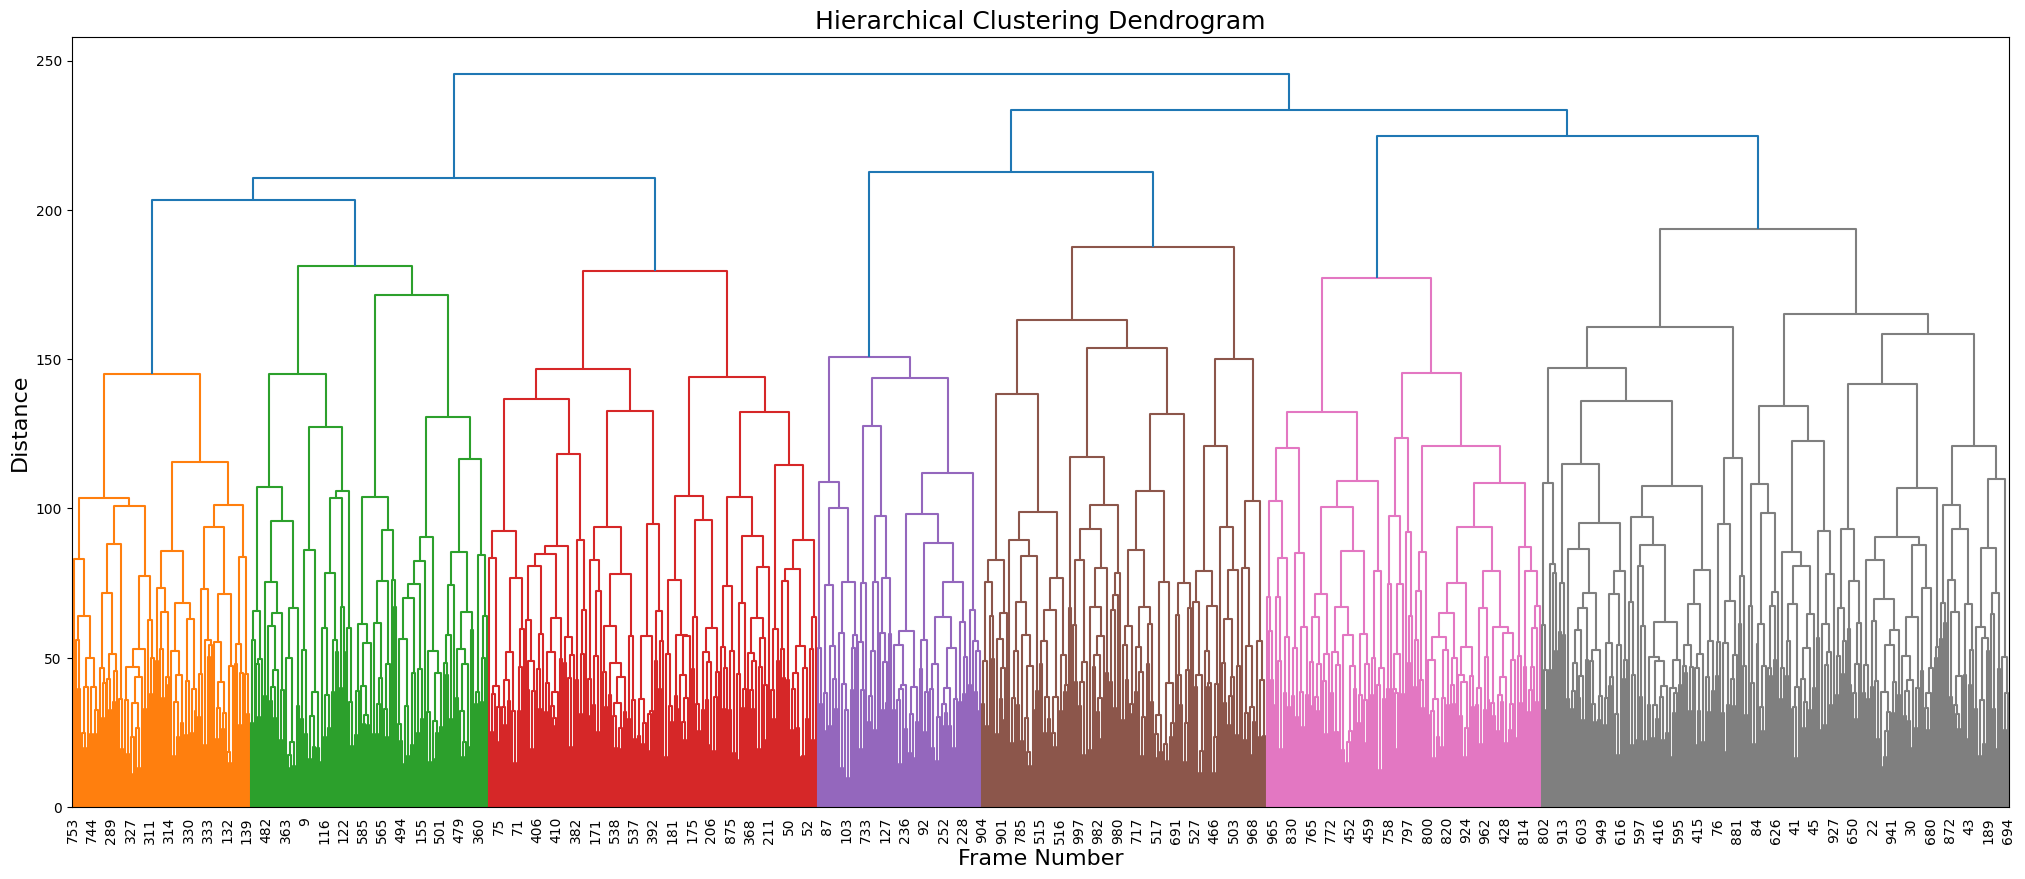

In [14]:
fig = plt.figure(figsize=(25, 10))

# Create the dendrogram
dn = dendrogram(
    Z,   
    leaf_rotation=90,  # Rotate x-axis labels
    leaf_font_size=10, # Adjust font size
    color_threshold=0.8 * max(Z[:, 2])
)

plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Frame Number', fontsize=16)
plt.ylabel('Distance', fontsize=16)

ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::10])  
plt.savefig("rmsd_matrix_dendrogram")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

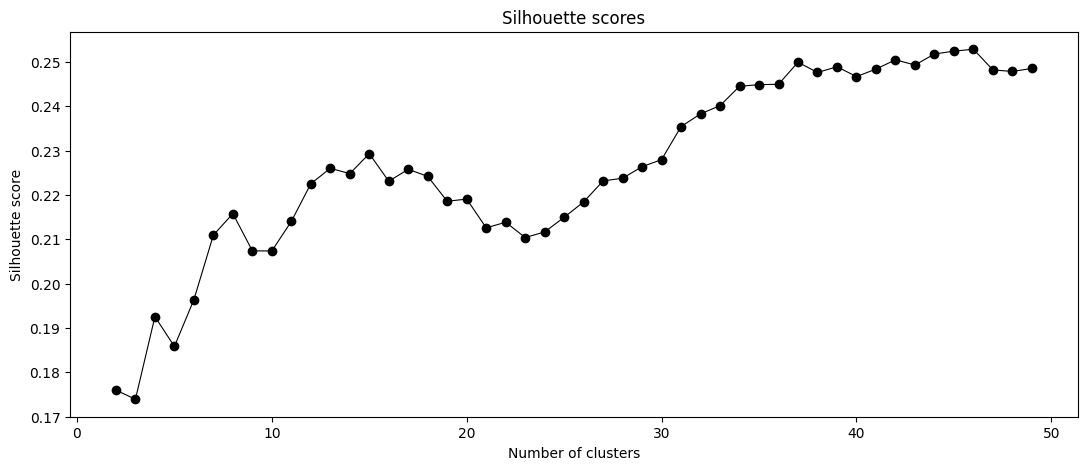

In [15]:
silhouette_avg_scores = []
k_range = range(2, 50)

for k in k_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='average').fit(rmsd_mat)
    silhouette_avg = silhouette_score(rmsd_mat, clustering.labels_)
    silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(13,5))
plt.plot(k_range, silhouette_avg_scores, '-o', linewidth = 0.8, color = 'black')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores')
plt.savefig("Silhouette_scores")

In [16]:
cl_labels_2 = fcluster(Z, t=2, criterion='maxclust')
clust2 = np.array(cl_labels_2)
indx_change2 = [i for i in range(1, len(clust2)) if clust2[i] != clust2[i-1]]

cl_labels_3 = fcluster(Z, t=3, criterion='maxclust')
clust3 = np.array(cl_labels_3)
indx_change3 = [i for i in range(1, len(clust3)) if clust3[i] != clust3[i-1]]

cl_labels_4 = fcluster(Z, t=4, criterion='maxclust')
clust4 = np.array(cl_labels_4)
indx_change4 = [i for i in range(1, len(clust4)) if clust4[i] != clust4[i-1]]

cl_labels_5 = fcluster(Z, t=5, criterion='maxclust')
clust5 = np.array(cl_labels_5)
indx_change5 = [i for i in range(1, len(clust5)) if clust5[i] != clust5[i-1]]

cl_labels_6 = fcluster(Z, t=6, criterion='maxclust')
clust6 = np.array(cl_labels_6)
indx_change6 = [i for i in range(1, len(clust6)) if clust6[i] != clust6[i-1]]

cl_labels_7 = fcluster(Z, t=7, criterion='maxclust')
clust7 = np.array(cl_labels_7)
indx_change7 = [i for i in range(1, len(clust7)) if clust7[i] != clust7[i-1]]

cl_labels_8 = fcluster(Z, t=8, criterion='maxclust')
clust8 = np.array(cl_labels_8)
indx_change8 = [i for i in range(1, len(clust8)) if clust8[i] != clust8[i-1]]

cl_labels_9 = fcluster(Z, t=9, criterion='maxclust')
clust9 = np.array(cl_labels_9)
indx_change9 = [i for i in range(1, len(clust9)) if clust9[i] != clust9[i-1]]


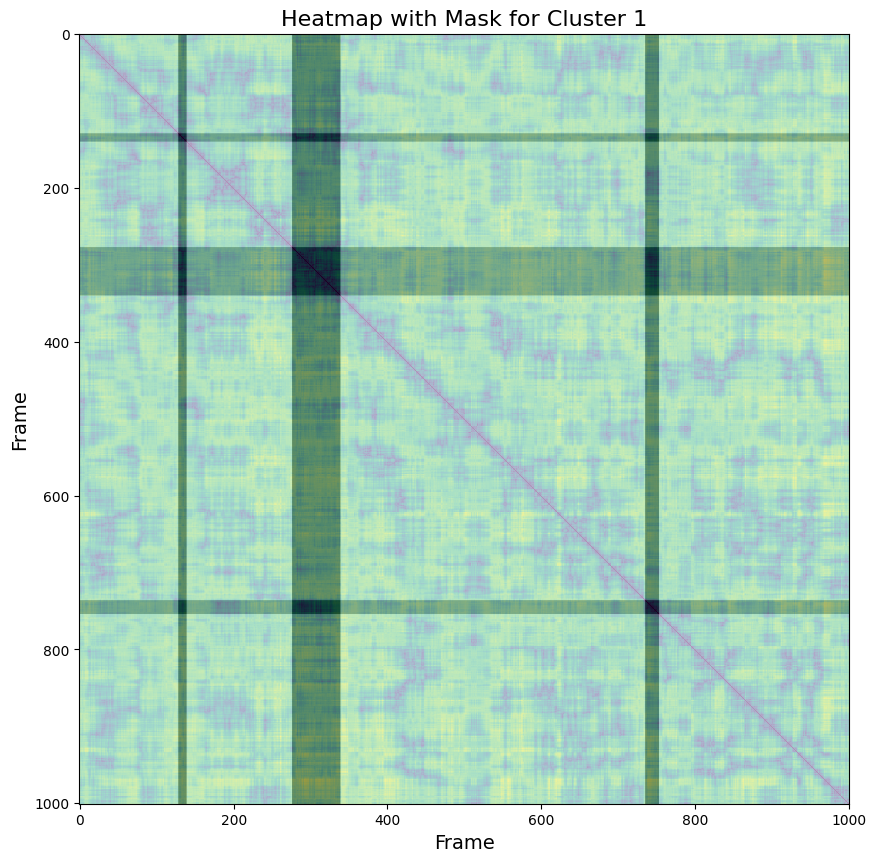

In [17]:
plt.figure(figsize = (10,10))
plt.title("Heatmap with Mask for Cluster 1",fontsize=16)
# Choose the cluster you want to plot the mask for
cluster_to_plot = 1
# Identify indices where cluster label matches the desired cluster
indices_cluster = np.where(cl_labels_8 == cluster_to_plot)
# Create a 2D mask to select the entire regions for the y-axis where the cluster label matches the desired cluster
mask = np.zeros_like(rmsd_mat, dtype=bool)
mask[indices_cluster[0], :] = True
# Convert mask to float for plotting
mask = mask.astype(float)
rotated_mask = np.rot90(mask)
# Plot the heatmap
plt.imshow(rmsd_mat, cmap='viridis', interpolation='nearest')
# Overlay the mask to shade specific regions for the selected cluster
plt.imshow(mask, cmap='Greys', alpha=0.35)
plt.imshow(rotated_mask, cmap='Greys', alpha=0.35)
plt.xlabel('Frame',fontsize=14)
plt.ylabel('Frame',fontsize=14)

plt.savefig("Heatmap_w_Mask_Cluster_1")

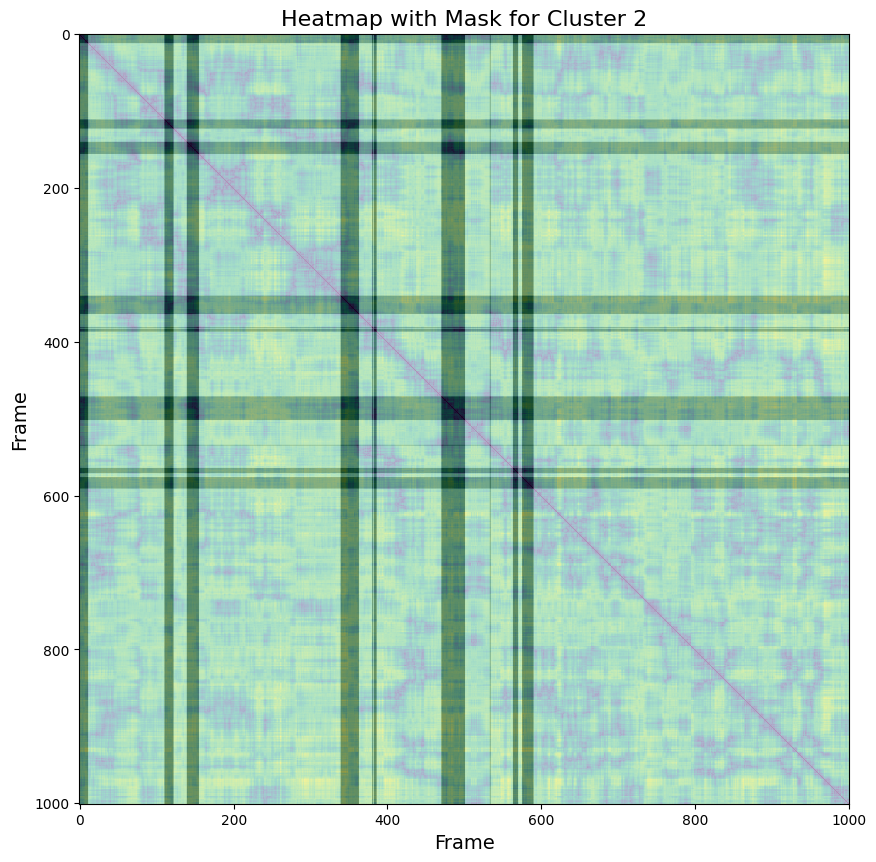

In [18]:
plt.figure(figsize = (10,10))
plt.title("Heatmap with Mask for Cluster 2",fontsize=16)
# Choose the cluster you want to plot the mask for
cluster_to_plot = 2
# Identify indices where cluster label matches the desired cluster
indices_cluster = np.where(cl_labels_8 == cluster_to_plot)
# Create a 2D mask to select the entire regions for the y-axis where the cluster label matches the desired cluster
mask = np.zeros_like(rmsd_mat, dtype=bool)
mask[indices_cluster[0], :] = True
# Convert mask to float for plotting
mask = mask.astype(float)
rotated_mask = np.rot90(mask)
# Plot the heatmap
plt.imshow(rmsd_mat, cmap='viridis', interpolation='nearest')
# Overlay the mask to shade specific regions for the selected cluster
plt.imshow(mask, cmap='Greys', alpha=0.35)
plt.imshow(rotated_mask, cmap='Greys', alpha=0.35)
plt.xlabel('Frame',fontsize=14)
plt.ylabel('Frame',fontsize=14)

plt.savefig("Heatmap_w_Mask_Cluster_2")